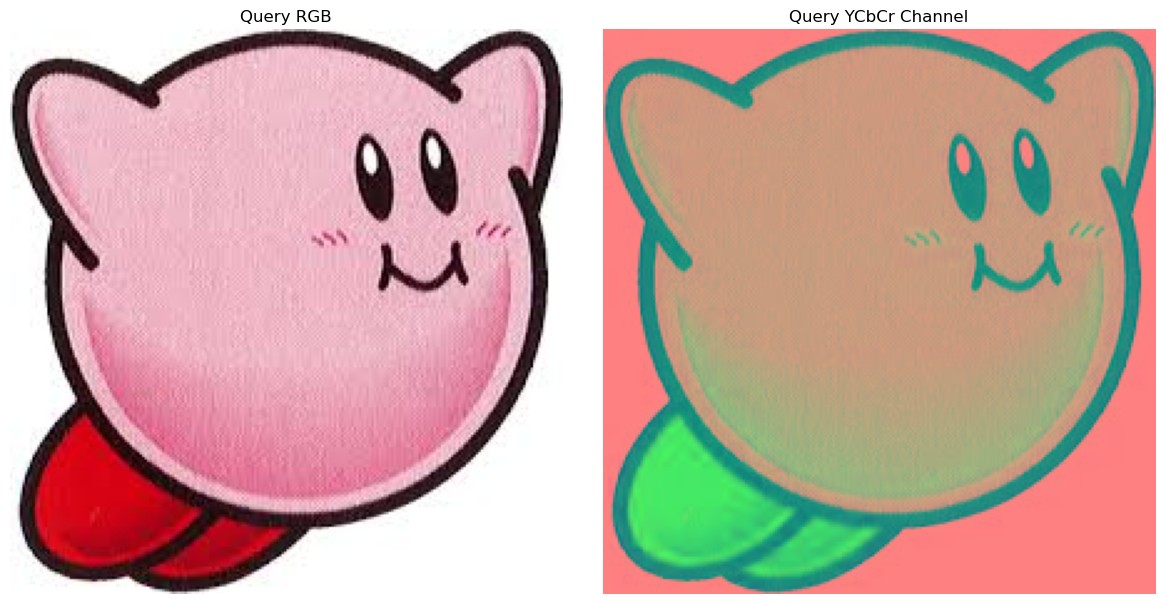

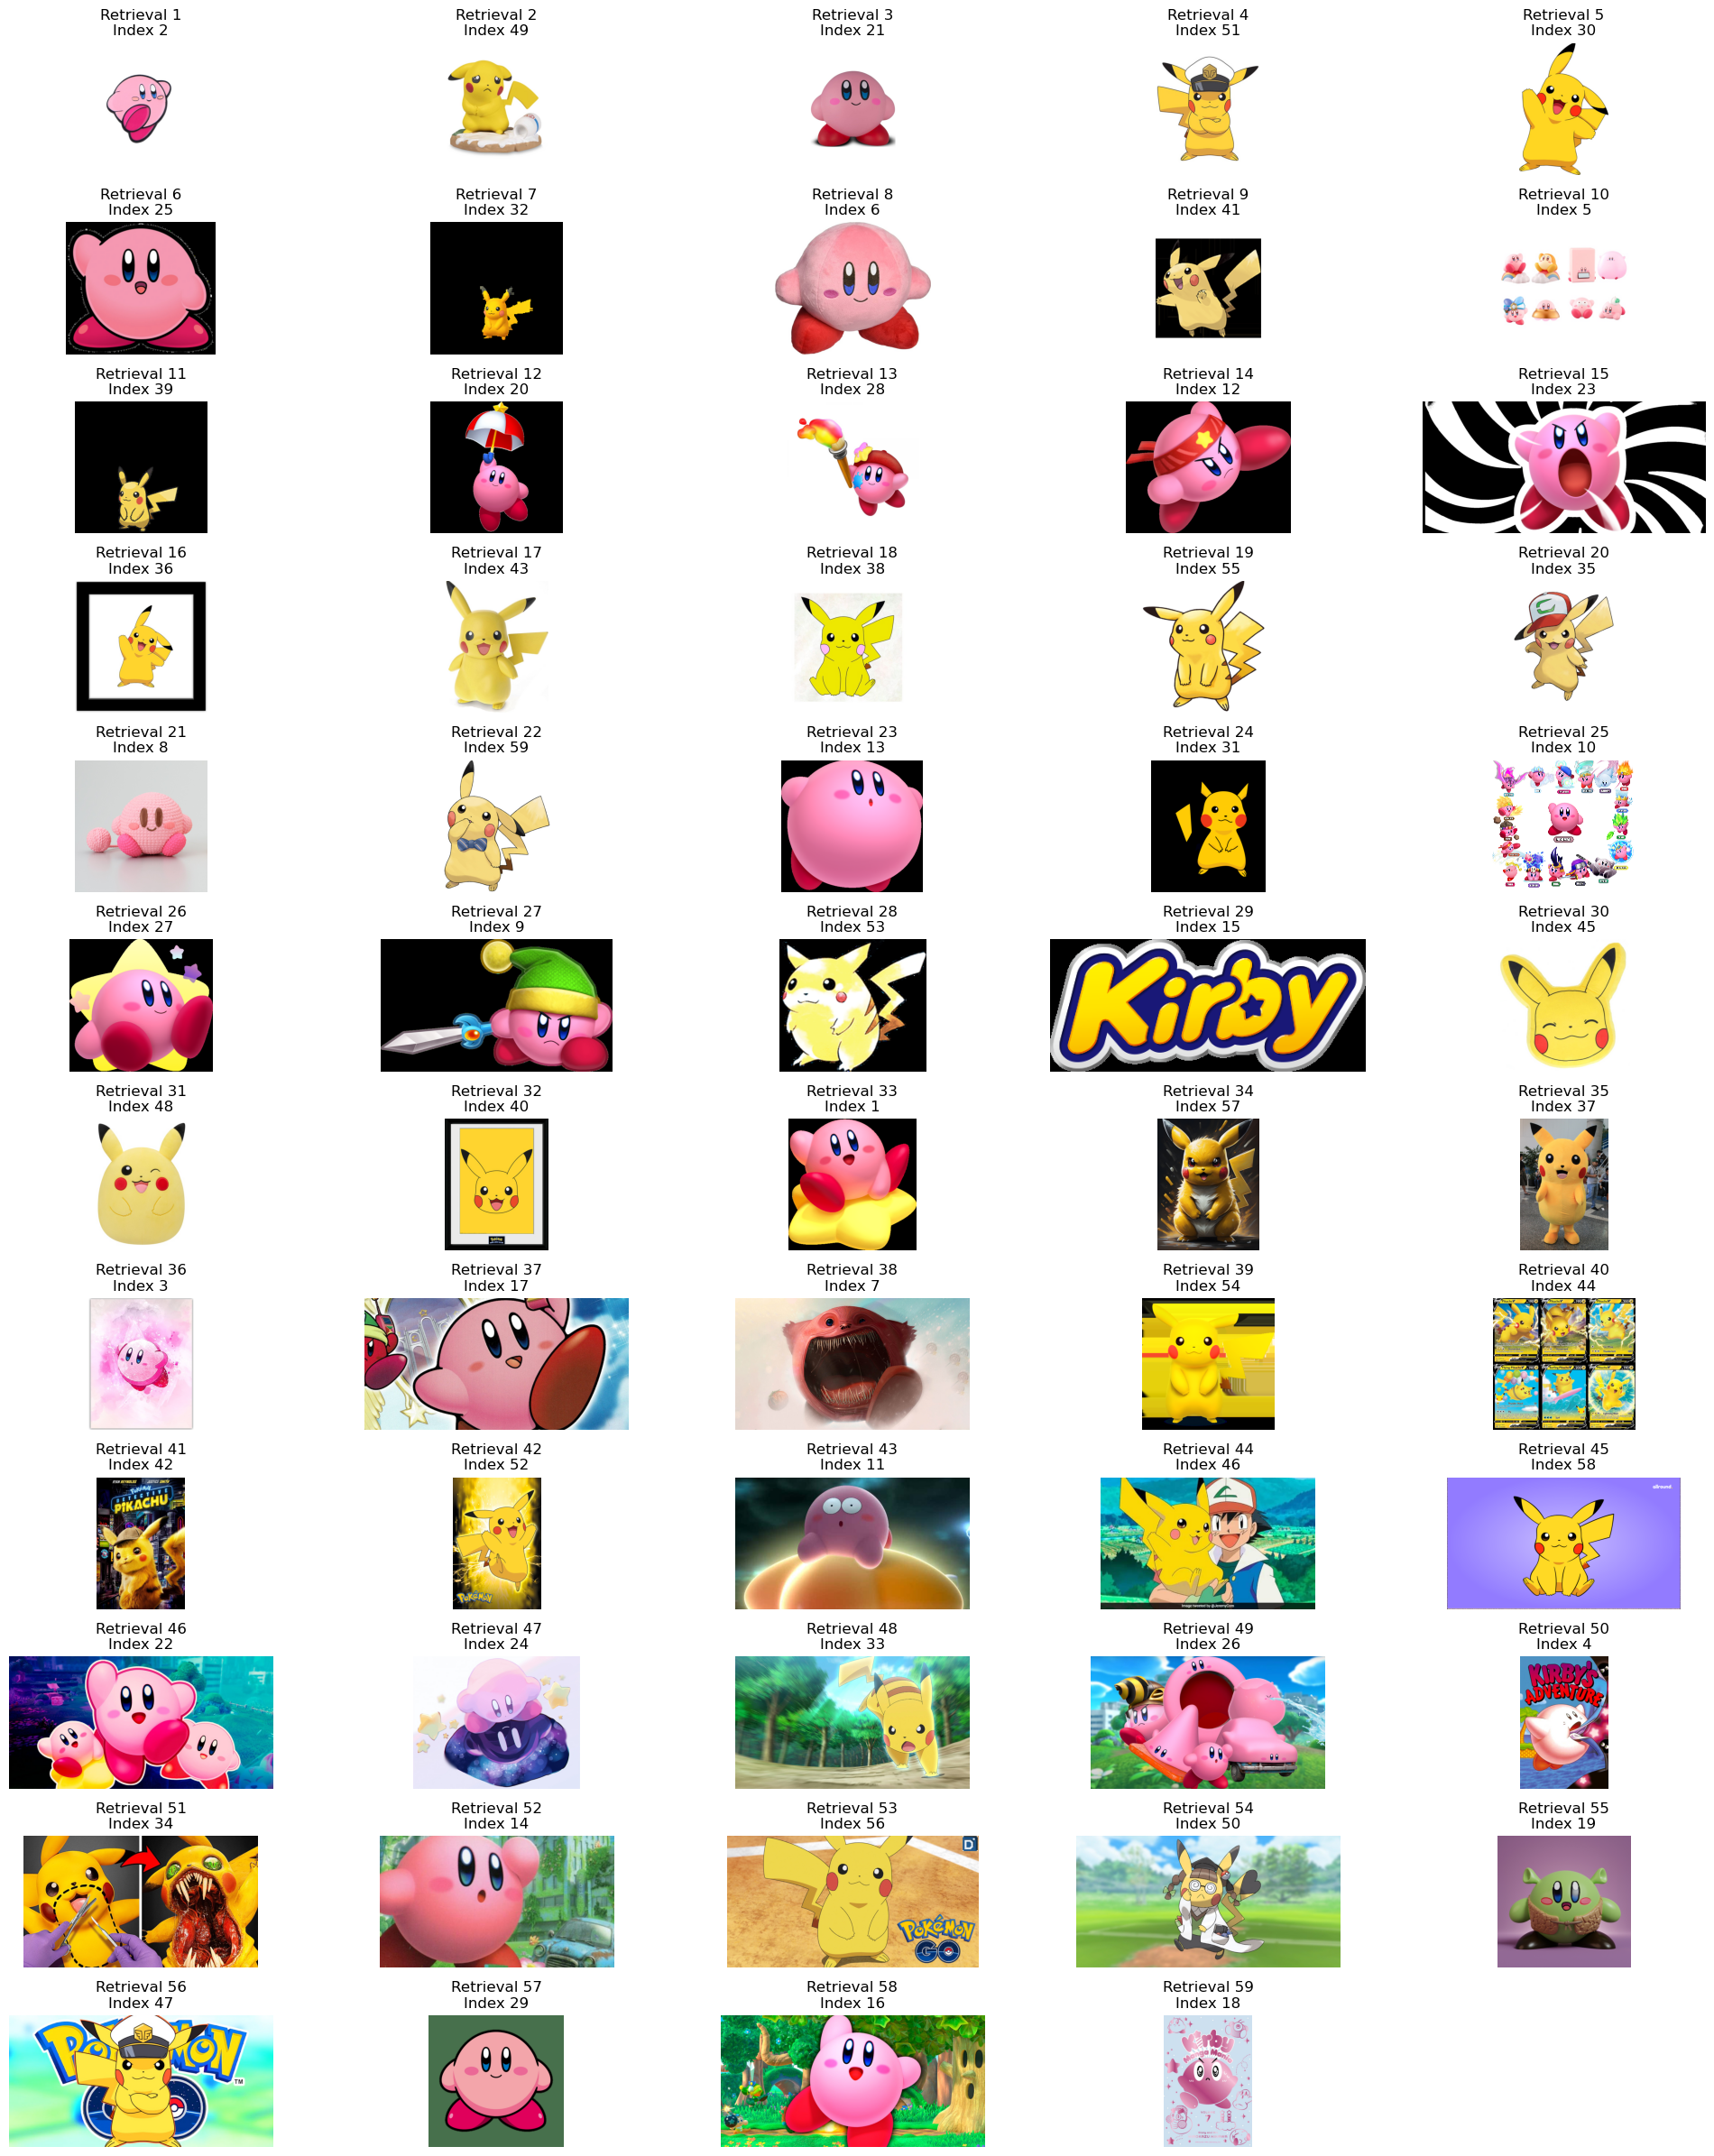

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# 定义RGB转YCbCr函数
def rgb_to_ycbcr(image):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return ycbcr_image

# 计算两个图像之间的欧氏距离（基于YCbCr通道）
def calculate_distance_ycbcr(image1, image2):
    # 将图像调整为相同的尺寸，这里选择 (256, 256)
    image1_resized = cv2.resize(image1, (256, 256))
    image2_resized = cv2.resize(image2, (256, 256))
    
    # 转换为YCbCr通道图像
    ycbcr_image1 = rgb_to_ycbcr(image1_resized)
    ycbcr_image2 = rgb_to_ycbcr(image2_resized)
    
    # 计算欧氏距离
    distance = np.sqrt(np.sum((ycbcr_image1 - ycbcr_image2)**2))
    return distance

# 函数化影像读取和处理
def load_images_from_folder(folder_path):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")
    
    image_paths = sorted(glob.glob(os.path.join(folder_path, "*.jpg")) + glob.glob(os.path.join(folder_path, "*.jpeg")))
    gallery_images = []
    
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            gallery_images.append(img_rgb)
        else:
            print(f"Error loading image: {path}")
    
    return gallery_images

# 设置第一个影像文件夹的路径和读取影像
folder_path1 = r"C:\Users\user\Downloads\OneDrive_1_2024-6-15\kirby"
gallery_images1 = load_images_from_folder(folder_path1)

# 设置第二个影像文件夹的路径和读取影像
folder_path2 = r"C:\Users\user\Downloads\OneDrive_1_2024-6-15\pikachu"
gallery_images2 = load_images_from_folder(folder_path2)

# 合并两个文件夹中的影像
gallery_images = gallery_images1 + gallery_images2

# 假设选择合并文件夹中的第一张影像作为查询影像
query_image_rgb = gallery_images[0]

# 计算查询影像与所有影像的距离（基于YCbCr通道），排除查询影像本身
distances = []
for index, image in enumerate(gallery_images):
    if index == 0:  # 跳过查询影像本身
        continue
    dist = calculate_distance_ycbcr(query_image_rgb, image)
    distances.append((dist, index))

# 根据距离排序索引
sorted_distances = sorted(distances, key=lambda x: x[0])
sorted_indices = [index for _, index in sorted_distances]

# 显示查询图像及其YCbCr通道图像
plt.figure(figsize=(12, 6))

# 显示查询图像的RGB
plt.subplot(1, 2, 1)
plt.imshow(query_image_rgb)
plt.title('Query RGB')
plt.axis('off')

# 显示查询图像的YCbCr通道图像
plt.subplot(1, 2, 2)
ycbcr_image = rgb_to_ycbcr(query_image_rgb)
plt.imshow(ycbcr_image, cmap='plasma', vmin=0, vmax=255)
plt.title('Query YCbCr Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# 显示前 59 个检索结果的RGB，每行显示五张图片
num_to_display = min(59, len(gallery_images) - 1)  # 排除查询影像本身
num_rows = 12  # 每行显示 5 张照片，共显示 12 行
num_cols = 5   # 每行显示 5 张照片

plt.figure(figsize=(20, 24))  # 调整图像大小以适应显示

for j in range(num_to_display):
    retrieved_index = sorted_indices[j]
    plt.subplot(num_rows, num_cols, j + 1)
    plt.imshow(gallery_images[retrieved_index])
    plt.title(f'Retrieval {j + 1}\nIndex {retrieved_index}')
    plt.axis('off')

plt.tight_layout()
plt.show()


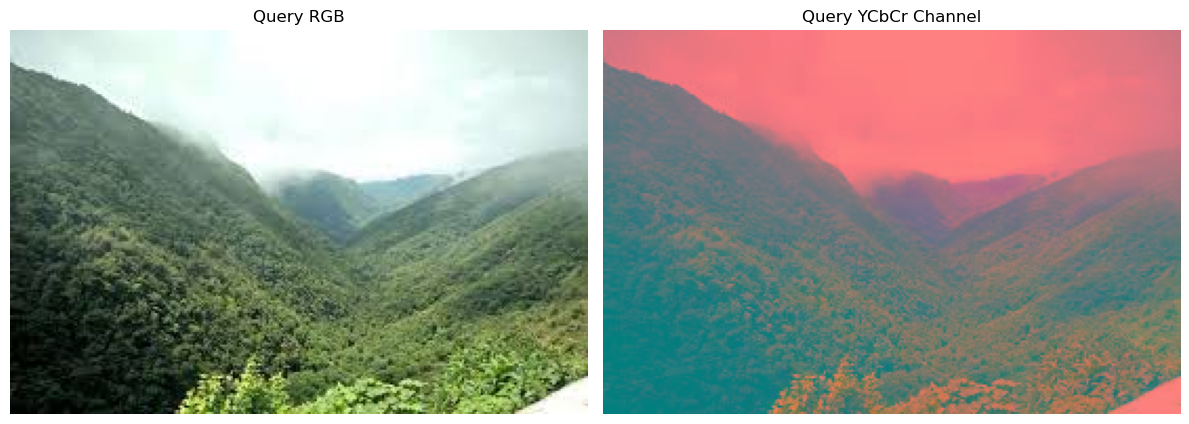

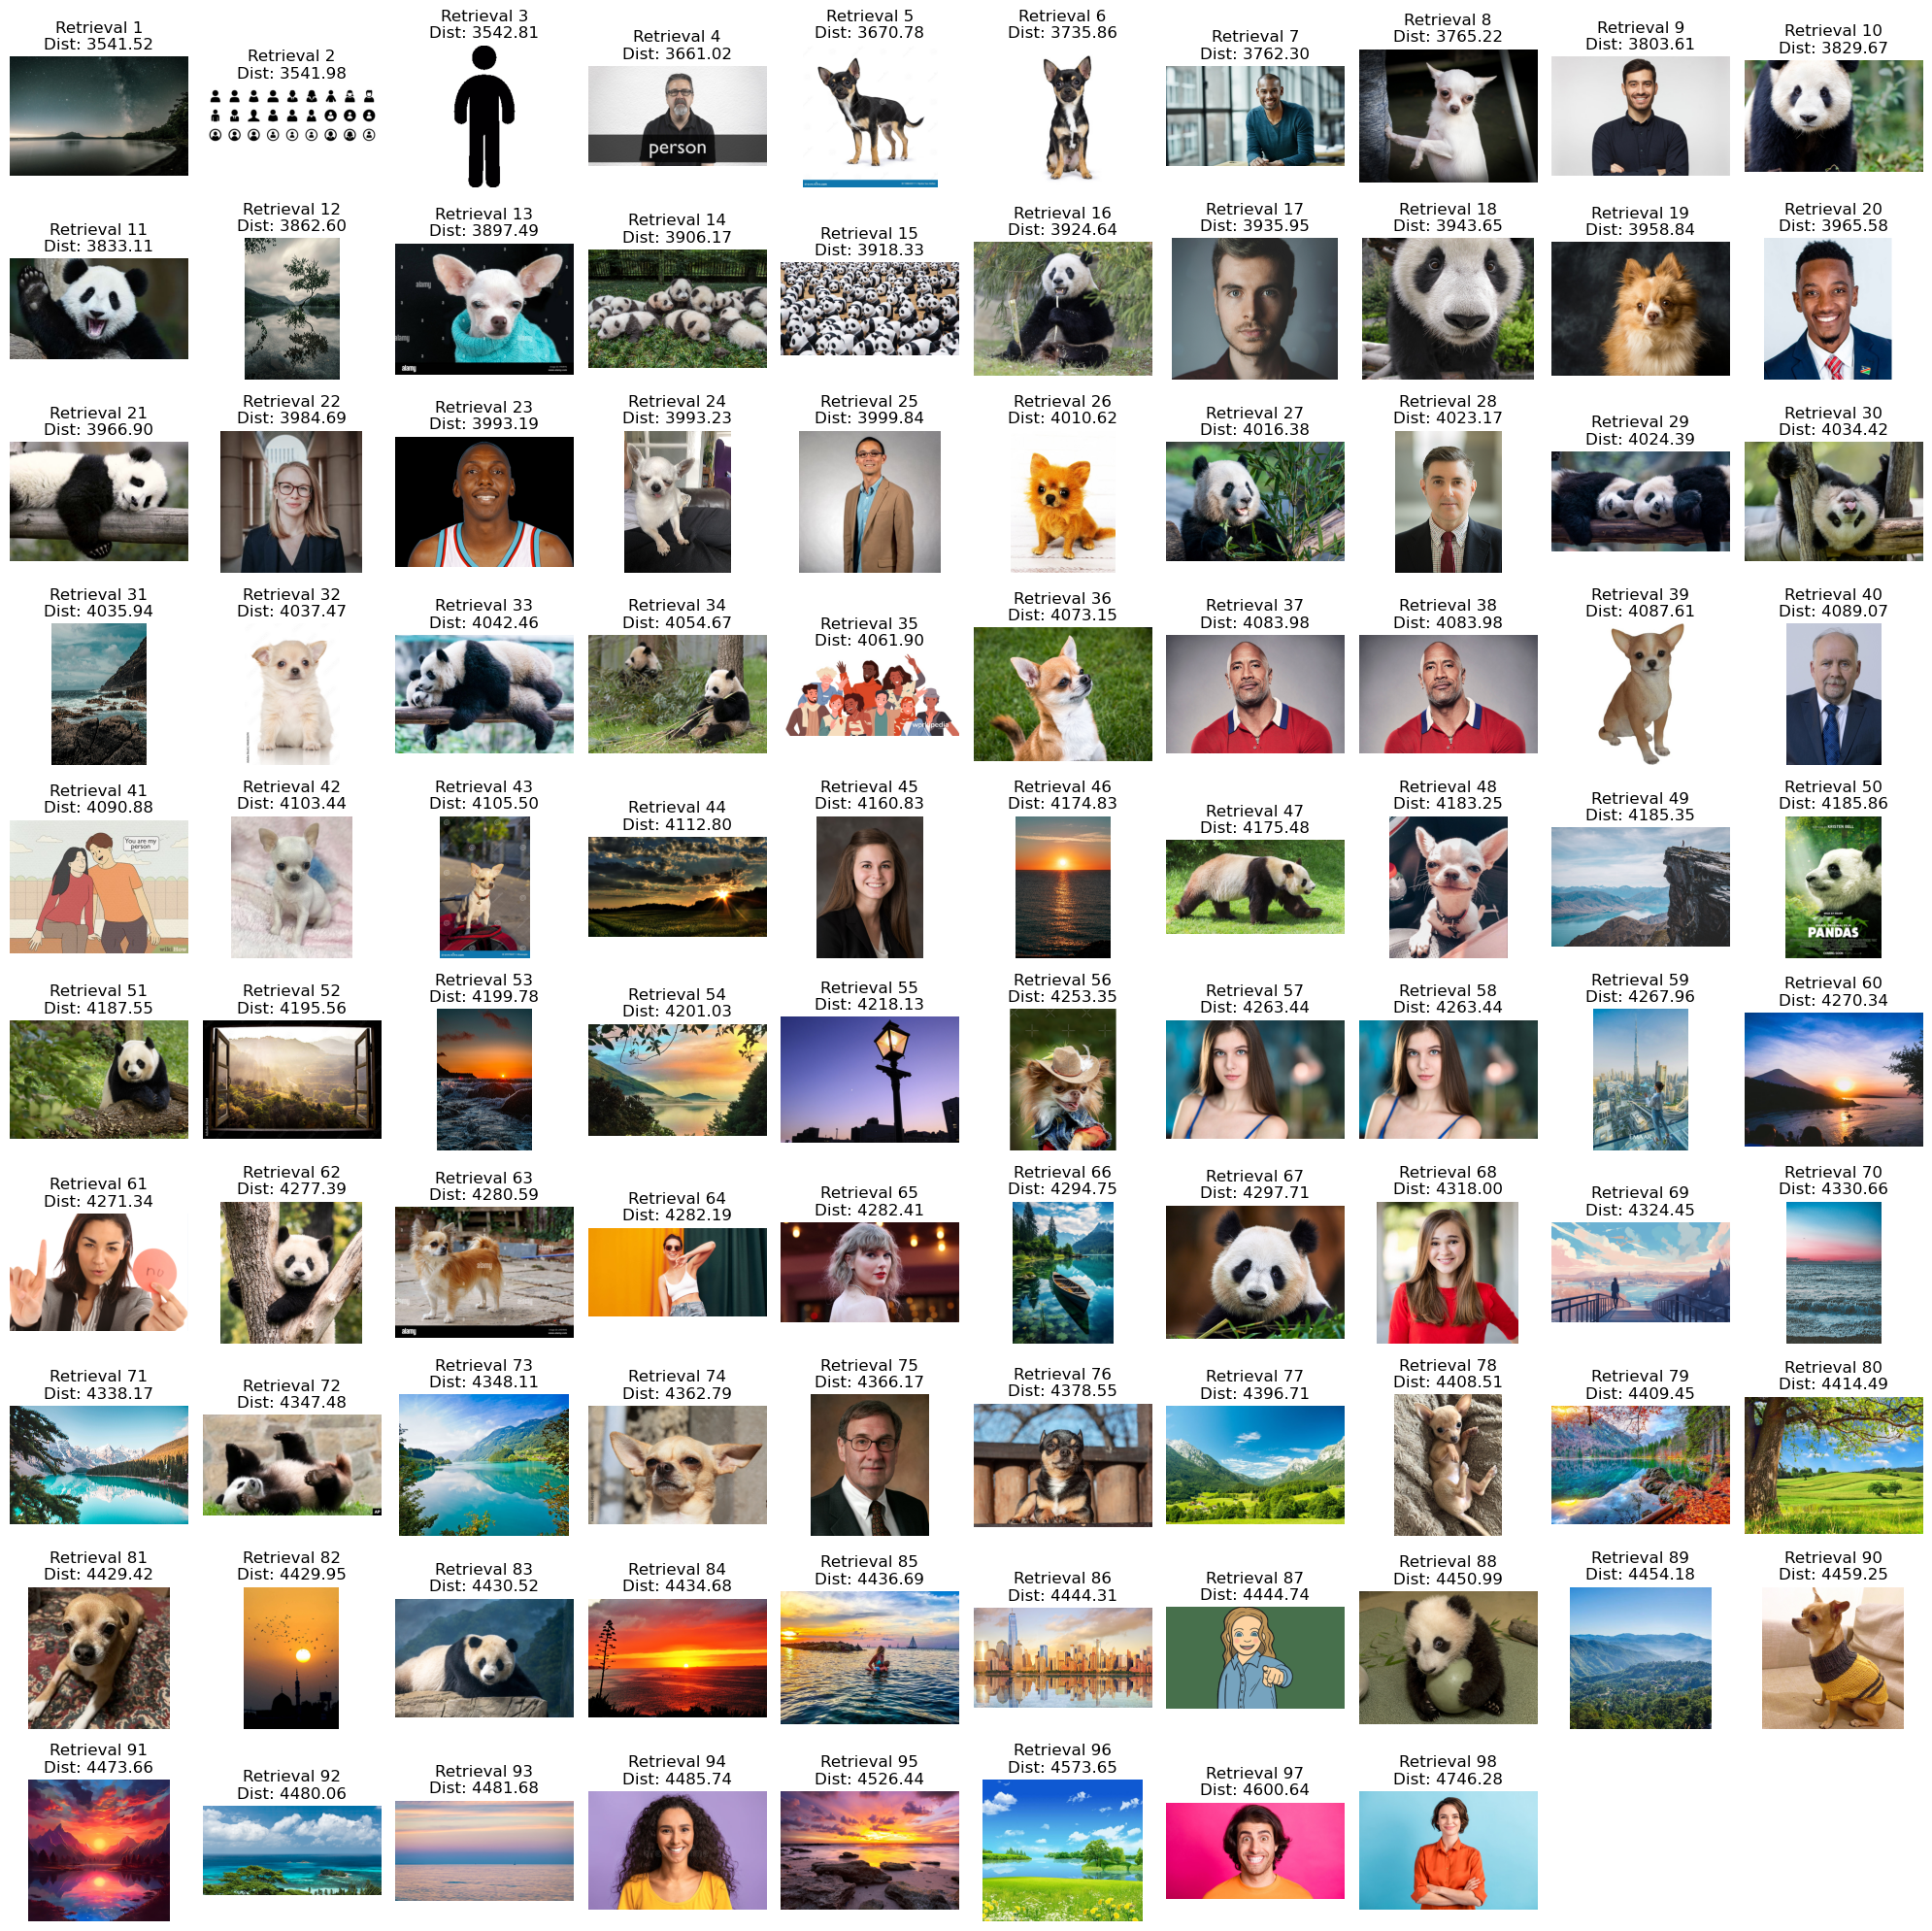

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# 定义RGB转YCbCr函数
def rgb_to_ycbcr(image):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return ycbcr_image

# 计算两个图像之间的欧氏距离（基于YCbCr通道）
def calculate_distance_ycbcr(image1, image2):
    # 将图像调整为相同的尺寸，这里选择 (256, 256)
    image1_resized = cv2.resize(image1, (256, 256))
    image2_resized = cv2.resize(image2, (256, 256))
    
    # 转换为YCbCr通道图像
    ycbcr_image1 = rgb_to_ycbcr(image1_resized)
    ycbcr_image2 = rgb_to_ycbcr(image2_resized)
    
    # 计算欧氏距离
    distance = np.sqrt(np.sum((ycbcr_image1 - ycbcr_image2)**2))
    return distance

# 函数化影像读取和处理
def load_images_from_folder(folder_path):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")
    
    image_paths = sorted(glob.glob(os.path.join(folder_path, "*.jpeg")) + glob.glob(os.path.join(folder_path, "*.jpg")))
    gallery_images = []
    
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            gallery_images.append(img_rgb)
        else:
            print(f"Error loading image: {path}")
    
    return gallery_images

# 设置查询影像文件夹的路径和读取影像
query_folder_path = r"C:\Users\user\simple_images\(2)"
query_images = load_images_from_folder(query_folder_path)

# 假设选择第一张影像作为查询影像
query_image_index = 0  # 可以根据需要修改这个索引
query_image_rgb = query_images[query_image_index]

# 计算查询影像与所有影像的距离（基于YCbCr通道），并跳过查询影像本身
distances = []
for i, image in enumerate(query_images):
    if i == query_image_index:
        continue  # 跳过查询影像本身
    dist = calculate_distance_ycbcr(query_image_rgb, image)
    distances.append((dist, i))

# 根据距离排序索引
distances.sort()
sorted_indices = [index for _, index in distances]

# 显示查询图像及其YCbCr通道图像
plt.figure(figsize=(12, 6))

# 显示查询图像的RGB
plt.subplot(1, 2, 1)
plt.imshow(query_image_rgb)
plt.title('Query RGB')
plt.axis('off')

# 显示查询图像的YCbCr通道图像
plt.subplot(1, 2, 2)
ycbcr_image = rgb_to_ycbcr(query_image_rgb)
plt.imshow(ycbcr_image, cmap='plasma', vmin=0, vmax=255)
plt.title('Query YCbCr Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# 显示前 100 个检索结果的RGB，并显示距离
num_to_display = min(100, len(sorted_indices))  # 显示前100个结果，确保不超过sorted_indices的长度
num_rows = 10
num_cols = 10
plt.figure(figsize=(20, 20))

for i in range(num_to_display):
    retrieved_index = sorted_indices[i]
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(query_images[retrieved_index])
    plt.title(f'Retrieval {i + 1}\nDist: {distances[i][0]:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()
